<a href="https://colab.research.google.com/github/clobos/Andres_ESALQ/blob/main/docente_pesquisador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
dados_docente_pesquisador = pd.read_csv('docente_pesquisador.csv')
dados_docente_pesquisador.head()

,Idade,Vínculo,Sexo,Ano_ingresso,Curso_grad,Programa_pós,Nível,Departamento,Setor,Origem_vist,...,C_int,C_infacd,C_orgtrans,C_qveic,C_visit,C_funcio,C_santi,C_mobl,C_aPSaude,Interesse_ativ
0,De 36 a 45 anos,Docente/Pesquisador,Feminino,2024.0,0,0,0,LCA,0,0,...,Bom,Ótimo,Ótimo,Ótimo,Não sei opinar,Não sei opinar,Regular,Regular,Não sei opinar,Bastante
1,Mais de 66 anos,Docente/Pesquisador,Masculino,1996.0,0,0,0,LPV,0,0,...,Bom,Não sei opinar,Bom,Ruim,Regular,Bom,Regular,Não sei opinar,Regular,Nenhum
2,De 56 a 65 anos,Docente/Pesquisador,Masculino,1989.0,0,0,0,LEB,0,0,...,Bom,Bom,Regular,Regular,Regular,Bom,Ruim,Bom,Não sei opinar,Nenhum
3,De 56 a 65 anos,Docente/Pesquisador,Masculino,2010.0,0,0,0,LEB,0,0,...,Bom,Bom,Bom,Ruim,Regular,Não sei opinar,Regular,Regular,Regular,Pouco
4,Mais de 66 anos,Docente/Pesquisador,Masculino,1993.0,0,0,0,LFN,0,0,...,Bom,Não sei opinar,Bom,Bom,Não sei opinar,Não sei opinar,Ruim,Não sei opinar,Bom,Nenhum


In [122]:
dados_docente_pesquisador.shape

(76, 57)

In [123]:
print(dados_docente_pesquisador.columns)

Index(['Idade', 'Vínculo', 'Sexo', 'Ano_ingresso', 'Curso_grad',
       'Programa_pós', 'Nível', 'Departamento', 'Setor', 'Origem_vist',
       'Frequencia', 'Campus_agradavel', 'Impacto', 'Participação',
       'Particip_fora', 'Interesse', 'Conhecimento', 'Compromisso',
       'Transformador', 'Segurança', 'Alt_seg_noite', 'Distância',
       'Modal_atecampus', 'S_Ilum', 'S_ag', 'S_equ', 'S_vias', 'S_cal',
       'S_acess', 'S_sinal', 'S_ciclovias', 'Aplicativo', 'C_Acol', 'C_pert',
       'C_Sau', 'C_atendaluno', 'C_PAPFE', 'C_moradia', 'C_cre', 'C_gen',
       'C_etn', 'C_aces', 'C_Rucas', 'C_alim', 'C_conv', 'C_esp', 'C_estudo',
       'C_int', 'C_infacd', 'C_orgtrans', 'C_qveic', 'C_visit', 'C_funcio',
       'C_santi', 'C_mobl', 'C_aPSaude', 'Interesse_ativ'],
      dtype='object')


In [124]:
def clean_idade(idade_str):
    """Removes 'De', 'a', and 'anos' from the idade string and returns a list of numbers."""
    if pd.isna(idade_str):
        return None
    cleaned = idade_str.replace('De ', '').replace(' a ', '-').replace(' anos', '').replace(' ', '')
    if '-' in cleaned:
        return [int(i) for i in cleaned.split('-')]
    elif cleaned.isdigit():
        return [int(cleaned)]
    else:
        return cleaned # Return as is if it doesn't fit the expected pattern

dados_docente_pesquisador['idade_limpa'] = dados_docente_pesquisador['Idade'].apply(clean_idade)

# Drop the original 'Idade' column
dados_docente_pesquisador = dados_docente_pesquisador.drop(columns=['Idade'])

In [125]:
dados_docente_pesquisador['idade_limpa'].value_counts()

,count
idade_limpa,
"[56, 65]",32
"[46, 55]",18
"[36, 45]",17
Maisde66,7
"[26, 35]",2


In [126]:
dados_docente_pesquisador = dados_docente_pesquisador[dados_docente_pesquisador['Departamento'] != '0']
dados_docente_pesquisador['Departamento'].value_counts()

,count
Departamento,
LEB,10
LCB,9
LES,9
LSO,8
LPV,5
DVPROD,5
LCF,4
LFN,4
LEA,4


In [127]:
departamento_counts = dados_docente_pesquisador['Departamento'].value_counts()

departamentos_to_keep = departamento_counts[departamento_counts >= 3].index

dados_docente_pesquisador = dados_docente_pesquisador[dados_docente_pesquisador['Departamento'].isin(departamentos_to_keep)]

dados_docente_pesquisador['Departamento'].value_counts()

,count
Departamento,
LEB,10
LCB,9
LES,9
LSO,8
LPV,5
DVPROD,5
LFN,4
LEA,4
LCF,4


In [128]:
dados_docente_pesquisador = dados_docente_pesquisador[dados_docente_pesquisador['idade_limpa'] != 'Maisde66']

In [129]:
# Define the desired order
idade_order = ['[26, 35]', '[36, 45]', '[46, 55]', '[56, 65]']
display(idade_order)

['[26, 35]', '[36, 45]', '[46, 55]', '[56, 65]']

In [130]:
# Convert 'idade_limpa' to a categorical type with the specified order
dados_docente_pesquisador['idade_limpa'] = dados_docente_pesquisador['idade_limpa'].astype(str)

dados_docente_pesquisador['idade_limpa'] = pd.Categorical(dados_docente_pesquisador['idade_limpa'], categories=idade_order, ordered=True)

dados_docente_pesquisador['idade_limpa'].value_counts()

,count
idade_limpa,
"[56, 65]",27
"[46, 55]",15
"[36, 45]",14
"[26, 35]",2


In [131]:
# Select float64 columns and calculate min and max
float_cols = dados_docente_pesquisador.select_dtypes(include='float64')
print("Min and Max for Float64 columns:")
display(float_cols.agg(['min', 'max']))

Min and Max for Float64 columns:


,Ano_ingresso,Distância,C_atendaluno
min,1982.0,1.0,NaN
max,2024.0,200.0,NaN


In [132]:
dados_docente_pesquisador['Distância'].describe()

,Distância
count,58.000000
mean,12.060345
std,26.302571
min,1.000000
25%,4.000000
50%,7.000000
75%,11.500000
max,200.000000


In [133]:
colunas_para_excluir_docente_pesquisador = [
    "Curso_grad",
    "Programa_pós",
    "Nível",
    "Setor",
    "Origem_vist",
    "S_ciclovias",
    "C_PAPFE",
    "C_moradia",
    "C_Rucas",
    "C_estudo",
    "C_atendaluno"
]

dados_docente_pesquisador = dados_docente_pesquisador.drop(columns=colunas_para_excluir_docente_pesquisador, errors='ignore')

In [134]:
dados_docente_pesquisador.head()

,Vínculo,Sexo,Ano_ingresso,Departamento,Frequencia,Campus_agradavel,Impacto,Participação,Particip_fora,Interesse,...,C_infacd,C_orgtrans,C_qveic,C_visit,C_funcio,C_santi,C_mobl,C_aPSaude,Interesse_ativ,idade_limpa
2,Docente/Pesquisador,Masculino,1989.0,LEB,Diariamente (de segunda a domingo),Sim,Não,"Conheço, mas não participei",Não,Moderadamente,...,Bom,Regular,Regular,Regular,Bom,Ruim,Bom,Não sei opinar,Nenhum,"[56, 65]"
3,Docente/Pesquisador,Masculino,2010.0,LEB,Apenas em dias úteis (de segunda a sexta),Sim,Em partes,Conheço e já participei,"Sim, no meu bairro/comunidade",Muito,...,Bom,Bom,Ruim,Regular,Não sei opinar,Regular,Regular,Regular,Pouco,"[56, 65]"
5,Docente/Pesquisador,Masculino,2018.0,DVPROD,Apenas em dias úteis (de segunda a sexta),Sim,Não,Não conheço,"Sim, em outros lugares",Muito,...,Bom,Bom,Bom,Péssimo,Péssimo,Péssimo,Péssimo,Regular,Bastante,"[46, 55]"
6,Docente/Pesquisador,Masculino,2024.0,LES,De uma à três vezes na semana,Sim,Não,"Conheço, mas não participei","Sim, em outros lugares",Muito,...,Bom,Regular,Regular,Não sei opinar,Bom,Não sei opinar,Não sei opinar,Não sei opinar,Bastante,"[56, 65]"
7,Docente/Pesquisador,Feminino,2024.0,LES,Apenas em dias úteis (de segunda a sexta),Sim,Não,Não conheço,"Sim, no meu bairro/comunidade",Extremamente,...,Bom,Bom,Bom,Não sei opinar,Bom,Ruim,Bom,Não sei opinar,Pouco,"[36, 45]"


In [135]:
# Select object columns and generate frequency tables
object_cols = dados_docente_pesquisador.select_dtypes(include='object')
print("\nFrequency Tables for Object columns:")
for col in object_cols.columns:
    print(f"\nFrequency for {col}:")
    display(object_cols[col].value_counts())


Frequency Tables for Object columns:

Frequency for Vínculo:


,count
Vínculo,
Docente/Pesquisador,58



Frequency for Sexo:


,count
Sexo,
Masculino,40
Feminino,18



Frequency for Departamento:


,count
Departamento,
LEB,10
LCB,9
LES,8
LSO,8
LEA,4
LCF,4
DVPROD,3
ESALQ,3
LFN,3



Frequency for Frequencia:


,count
Frequencia,
Apenas em dias úteis (de segunda a sexta),36
Diariamente (de segunda a domingo),19
De uma à três vezes na semana,3



Frequency for Campus_agradavel:


,count
Campus_agradavel,
Sim,58



Frequency for Impacto:


,count
Impacto,
Não,43
Em partes,13
Sim,2



Frequency for Participação:


,count
Participação,
Conheço e já participei,32
"Conheço, mas não participei",17
Não conheço,8



Frequency for Particip_fora:


,count
Particip_fora,
Não,30
"Sim, em outros lugares",15
"Sim, no meu bairro/comunidade",9
"Sim, na instituição religiosa",3



Frequency for Interesse:


,count
Interesse,
Muito,34
Moderadamente,12
Extremamente,12



Frequency for Conhecimento:


,count
Conhecimento,
Moderadamente,30
Muito,19
Extremamente,5
Pouco,4



Frequency for Compromisso:


,count
Compromisso,
Muito,30
Moderadamente,16
Extremamente,11
Muito Pouco,1



Frequency for Transformador:


,count
Transformador,
Moderadamente,21
Muito,21
Pouco,8
Extremamente,7
Muito Pouco,1



Frequency for Segurança:


,count
Segurança,
Seguro(a),38
Inseguro(a),12
Muito seguro(a),3
Indiferente,3
Muito inseguro(a),2



Frequency for Alt_seg_noite:


,count
Alt_seg_noite,
"Sim, me sinto menos seguro(a) no Campus no período noturno",31
"Não, continuo me sentindo seguro(a)",25
Não frequento o Campus no período noturno,2



Frequency for Modal_atecampus:


,count
Modal_atecampus,
Carro,53
Bicicleta,1
"Bicicleta e a pé, uso os dois com frequência!",1



Frequency for S_Ilum:


,count
S_Ilum,
Regular,18
Ruim,16
Bom,15
Péssimo,6
Ótimo,2
Não sei opinar,1



Frequency for S_ag:


,count
S_ag,
Regular,23
Ruim,12
Bom,11
Péssimo,9
Não sei opinar,2
Ótimo,1



Frequency for S_equ:


,count
S_equ,
Regular,19
Ruim,16
Bom,9
Não sei opinar,8
Péssimo,5



Frequency for S_vias:


,count
S_vias,
Regular,23
Bom,18
Ruim,11
Péssimo,4
Ótimo,2



Frequency for S_cal:


,count
S_cal,
Ruim,21
Regular,21
Bom,9
Péssimo,5
Não sei opinar,1
Ótimo,1



Frequency for S_acess:


,count
S_acess,
Ruim,23
Péssimo,15
Regular,10
Bom,6
Não sei opinar,3



Frequency for S_sinal:


,count
S_sinal,
Regular,23
Bom,15
Ruim,15
Péssimo,5



Frequency for Aplicativo:


,count
Aplicativo,
"Conheço, mas nunca utilizei",22
Conheço,21
Não conheço,15



Frequency for C_Acol:


,count
C_Acol,
Regular,19
Bom,17
Ótimo,7
Não sei opinar,5
Ruim,5
Péssimo,4



Frequency for C_pert:


,count
C_pert,
Ótimo,21
Regular,16
Bom,14
Ruim,5
Péssimo,1



Frequency for C_Sau:


,count
C_Sau,
Regular,21
Não sei opinar,16
Ruim,7
Bom,7
Péssimo,5



Frequency for C_cre:


,count
C_cre,
Não sei opinar,33
Regular,10
Bom,5
Ótimo,4
Péssimo,3
Ruim,2



Frequency for C_gen:


,count
C_gen,
Regular,20
Não sei opinar,17
Bom,10
Ruim,6
Péssimo,3
Ótimo,1



Frequency for C_etn:


,count
C_etn,
Regular,19
Não sei opinar,15
Bom,12
Ruim,7
Péssimo,3
Ótimo,1



Frequency for C_aces:


,count
C_aces,
Regular,20
Bom,15
Ruim,13
Péssimo,8
Não sei opinar,1



Frequency for C_alim:


,count
C_alim,
Ruim,21
Regular,15
Péssimo,10
Bom,6
Não sei opinar,4
Ótimo,1



Frequency for C_conv:


,count
C_conv,
Ruim,21
Regular,18
Péssimo,6
Bom,6
Não sei opinar,5
Ótimo,1



Frequency for C_esp:


,count
C_esp,
Não sei opinar,17
Bom,16
Regular,12
Ótimo,6
Ruim,4
Péssimo,2



Frequency for C_int:


,count
C_int,
Bom,28
Ótimo,12
Regular,9
Ruim,7



Frequency for C_infacd:


,count
C_infacd,
Bom,29
Ótimo,15
Regular,7
Ruim,3
Não sei opinar,3



Frequency for C_orgtrans:


,count
C_orgtrans,
Bom,26
Regular,18
Ruim,6
Péssimo,4
Ótimo,3



Frequency for C_qveic:


,count
C_qveic,
Regular,26
Bom,13
Ruim,12
Péssimo,4
Não sei opinar,1



Frequency for C_visit:


,count
C_visit,
Bom,22
Regular,19
Ruim,7
Não sei opinar,6
Péssimo,3



Frequency for C_funcio:


,count
C_funcio,
Bom,25
Regular,13
Não sei opinar,10
Péssimo,3
Ruim,3
Ótimo,3
0,1



Frequency for C_santi:


,count
C_santi,
Ruim,32
Regular,10
Péssimo,8
Não sei opinar,4
Bom,2



Frequency for C_mobl:


,count
C_mobl,
Regular,20
Ruim,15
Bom,9
Ótimo,5
Péssimo,4
Não sei opinar,3



Frequency for C_aPSaude:


,count
C_aPSaude,
Regular,19
Bom,16
Ruim,9
Não sei opinar,8
Ótimo,4
Péssimo,1



Frequency for Interesse_ativ:


,count
Interesse_ativ,
Pouco,31
Bastante,18
Nenhum,5
Não sei responder,3


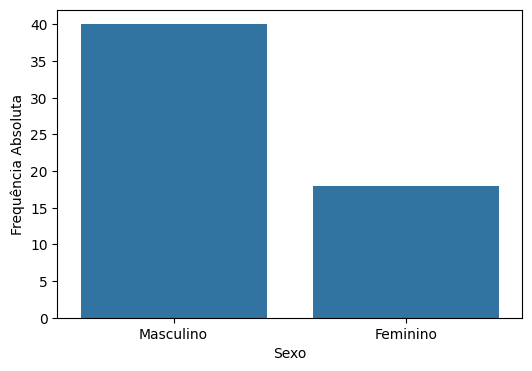

In [136]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dados_docente_pesquisador, x = dados_docente_pesquisador['Sexo'])
plt.ylabel('Frequência Absoluta')
plt.xlabel('Sexo')
#plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.show()

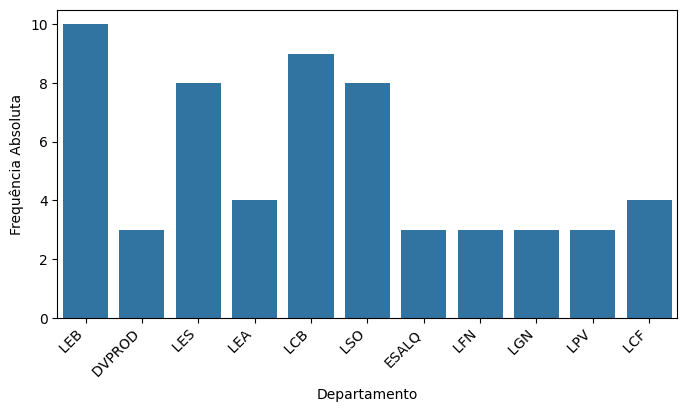

In [137]:
plt.figure(figsize=(8, 4))
sns.countplot(data=dados_docente_pesquisador, x = dados_docente_pesquisador['Departamento'])
plt.ylabel('Frequência Absoluta')
plt.xlabel('Departamento')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.show()

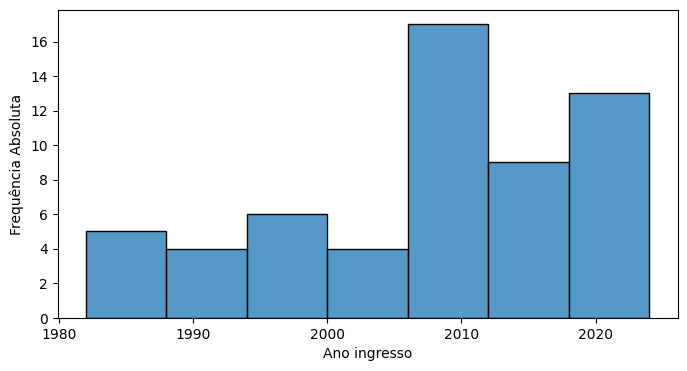

In [138]:
#Sexo 	Ano_ingresso 	Departamento
plt.figure(figsize=(8, 4))
sns.histplot(data=dados_docente_pesquisador, x=dados_docente_pesquisador['Ano_ingresso'])
plt.xlabel('Ano ingresso')
plt.ylabel('Frequência Absoluta')
plt.show()

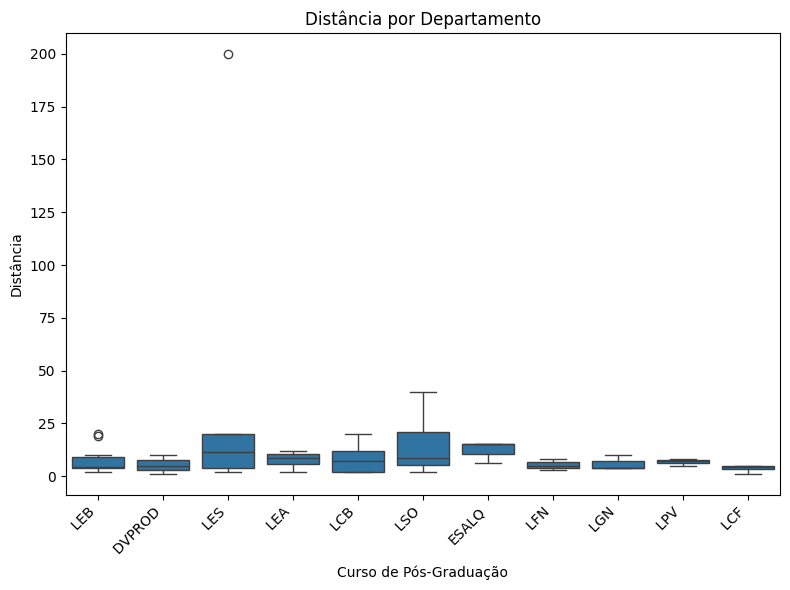

In [139]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dados_docente_pesquisador, x='Departamento', y='Distância')
plt.title('Distância por Departamento')
plt.xlabel('Curso de Pós-Graduação')
plt.ylabel('Distância')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

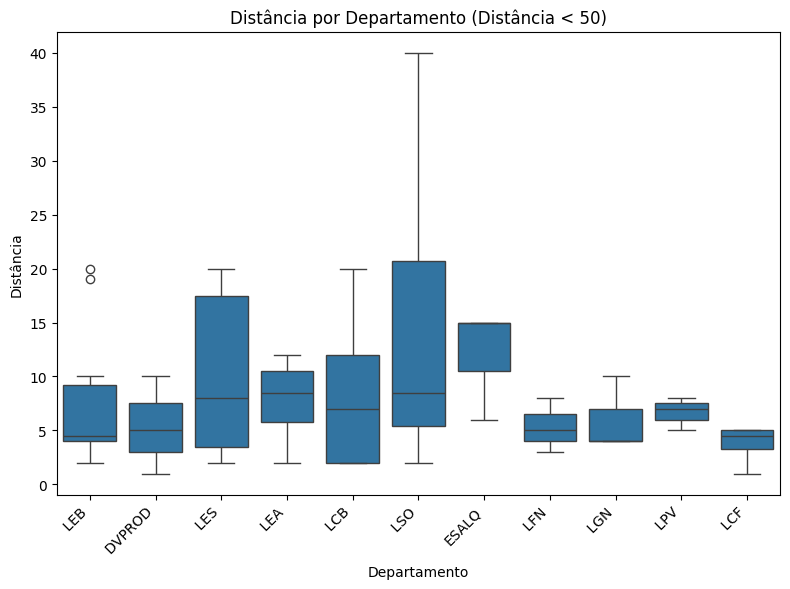

In [140]:
dados_filtrados = dados_docente_pesquisador[dados_docente_pesquisador['Distância'] < 50]

plt.figure(figsize=(8, 6))
sns.boxplot(data=dados_filtrados, x='Departamento', y='Distância')
plt.title('Distância por Departamento (Distância < 50)')
plt.xlabel('Departamento')
plt.ylabel('Distância')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

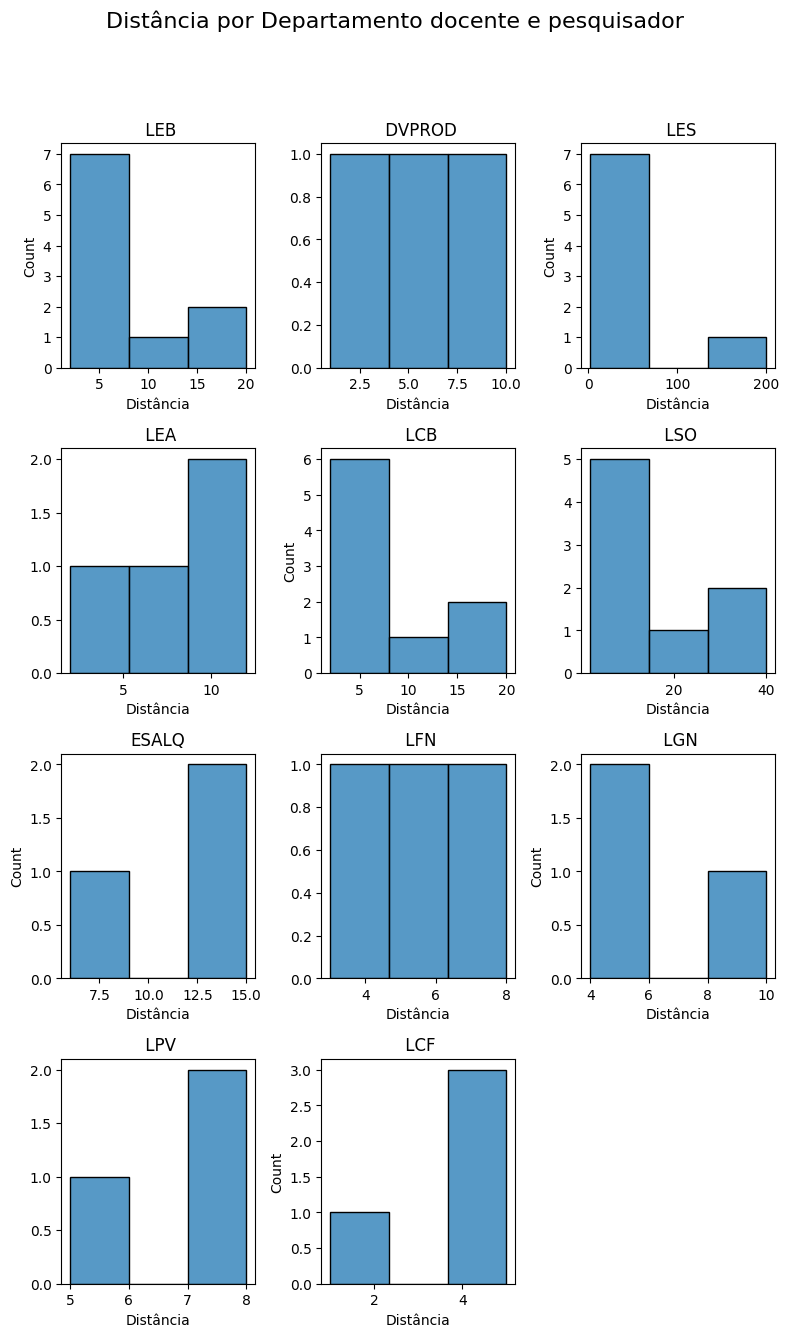

In [141]:
Departamento = dados_docente_pesquisador['Departamento'].unique()
n_Departamento = len(Departamento)

fig, axes = plt.subplots(6, 3, figsize=(8, 20))
fig.suptitle('Distância por Departamento docente e pesquisador', fontsize=16)

axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, aux in enumerate(Departamento):
    if i < len(axes) - 1: # Only plot in the first 7 subplots (4*2 - 1 = 7)
        subset_data = dados_docente_pesquisador[dados_docente_pesquisador['Departamento'] == aux]
        sns.histplot(data=subset_data, x='Distância', bins=3, ax=axes[i])
        axes[i].set_title(aux)
        axes[i].set_xlabel('Distância')
        if i % 2 != 0: # Remove y-label from subplots in the second column
            axes[i].set_ylabel('')


# Hide the last subplot
for j in range(len(Departamento), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

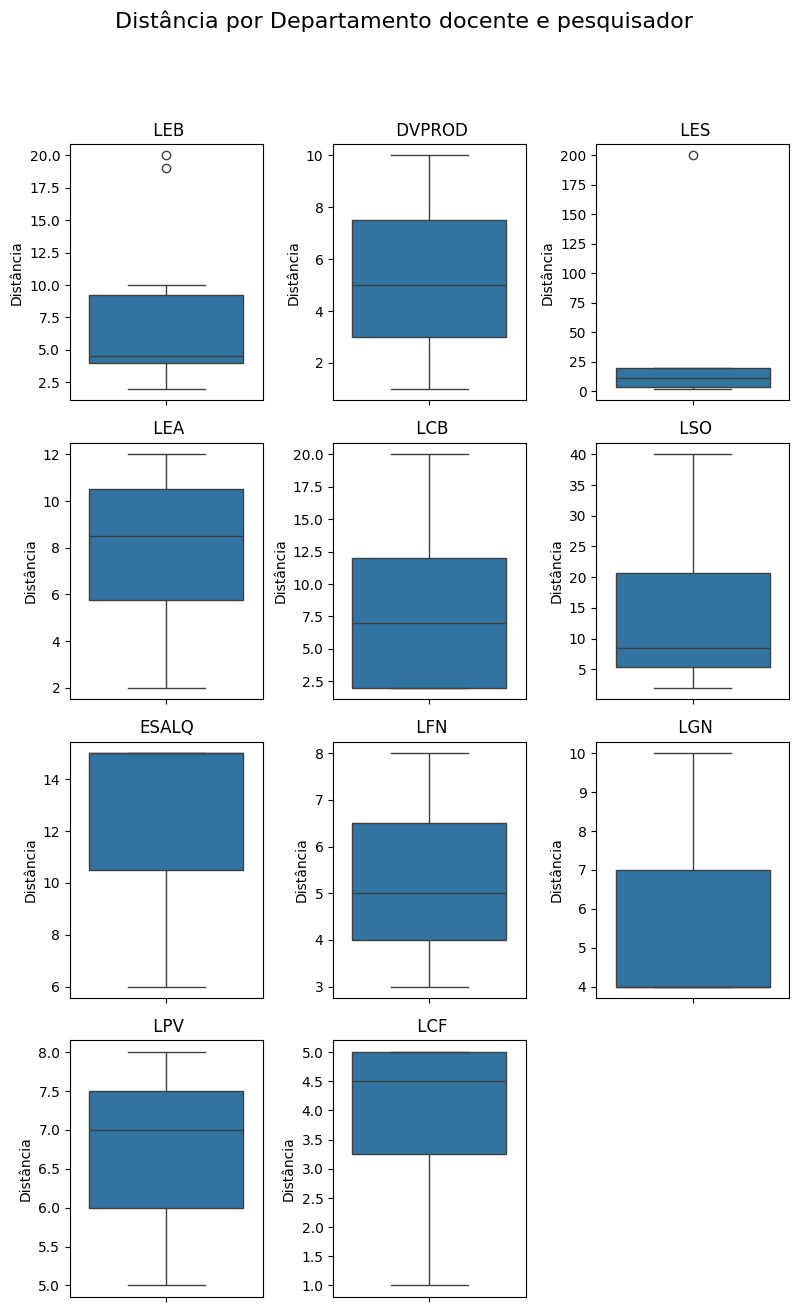

In [142]:
Departamento = dados_docente_pesquisador['Departamento'].unique()
n_Departamento = len(Departamento)

fig, axes = plt.subplots(6, 3, figsize=(8, 20))
fig.suptitle('Distância por Departamento docente e pesquisador', fontsize=16)

axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, aux in enumerate(Departamento):
    if i < len(axes): # Ensure we don't go out of bounds
        subset_data = dados_docente_pesquisador[dados_docente_pesquisador['Departamento'] == aux]
        sns.boxplot(data=subset_data, y='Distância', ax=axes[i])
        axes[i].set_title(aux)
        axes[i].set_ylabel('Distância')
        axes[i].set_xlabel('') # Remove x-label for individual boxplots


# Hide any unused subplots
for j in range(len(Departamento), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

In [144]:
print(dados_docente_pesquisador.columns)

Index(['Vínculo', 'Sexo', 'Ano_ingresso', 'Departamento', 'Frequencia',
       'Campus_agradavel', 'Impacto', 'Participação', 'Particip_fora',
       'Interesse', 'Conhecimento', 'Compromisso', 'Transformador',
       'Segurança', 'Alt_seg_noite', 'Distância', 'Modal_atecampus', 'S_Ilum',
       'S_ag', 'S_equ', 'S_vias', 'S_cal', 'S_acess', 'S_sinal', 'Aplicativo',
       'C_Acol', 'C_pert', 'C_Sau', 'C_cre', 'C_gen', 'C_etn', 'C_aces',
       'C_alim', 'C_conv', 'C_esp', 'C_int', 'C_infacd', 'C_orgtrans',
       'C_qveic', 'C_visit', 'C_funcio', 'C_santi', 'C_mobl', 'C_aPSaude',
       'Interesse_ativ', 'idade_limpa'],
      dtype='object')


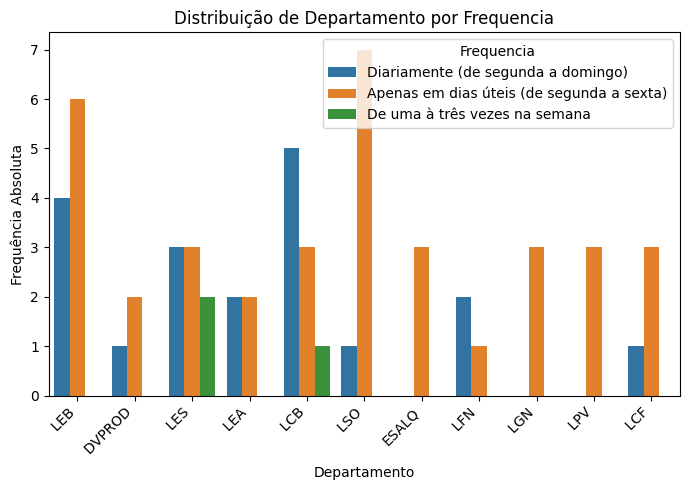

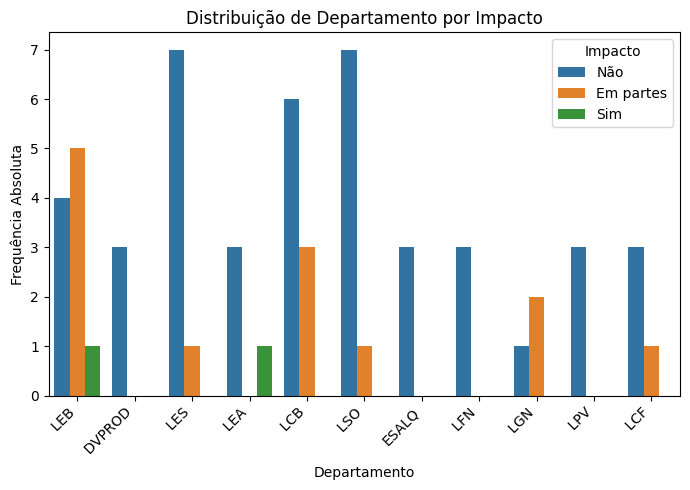

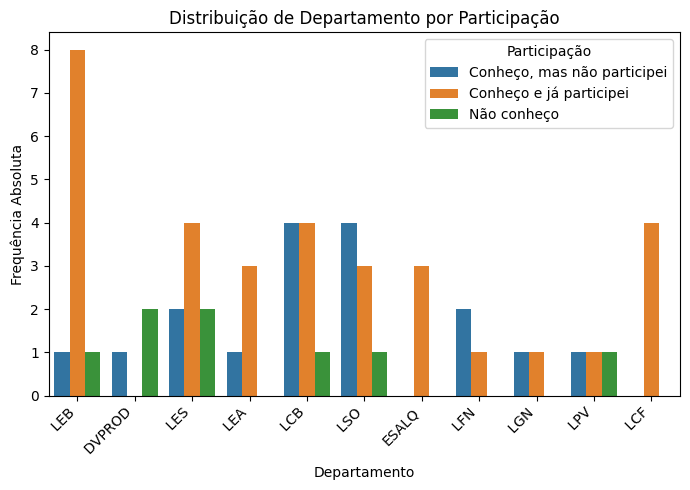

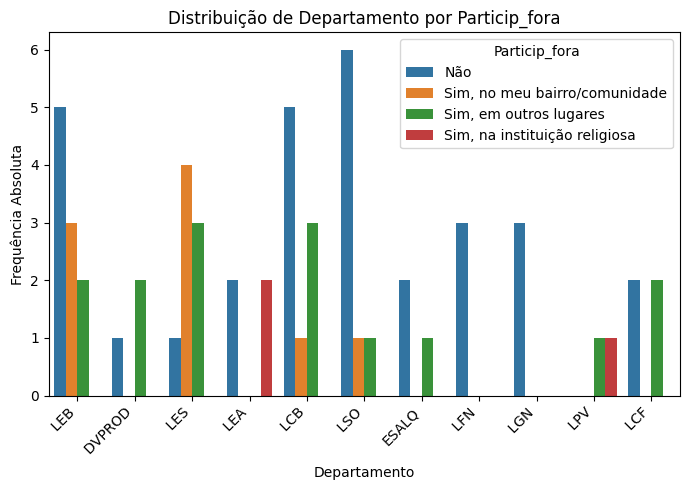

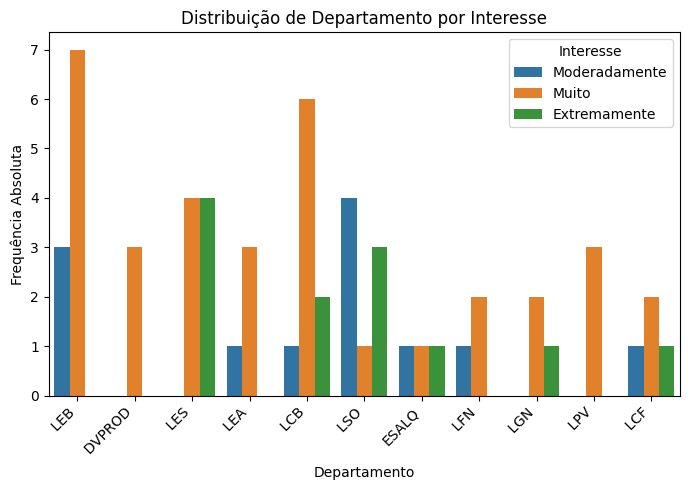

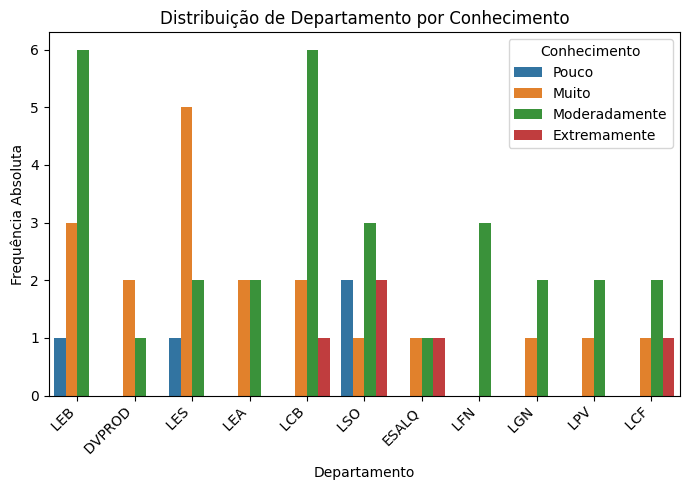

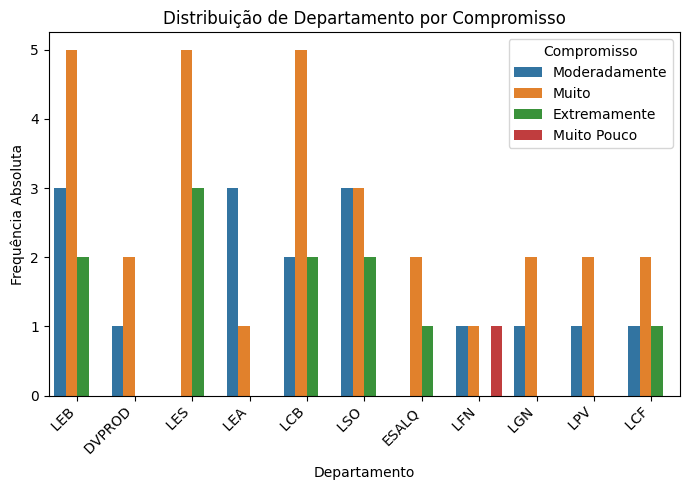

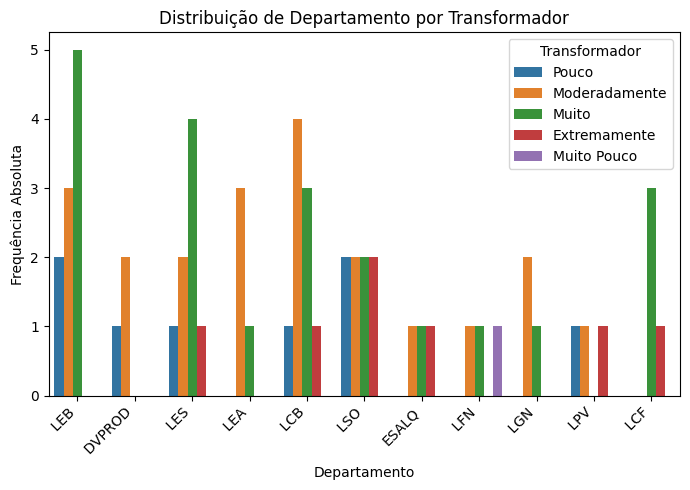

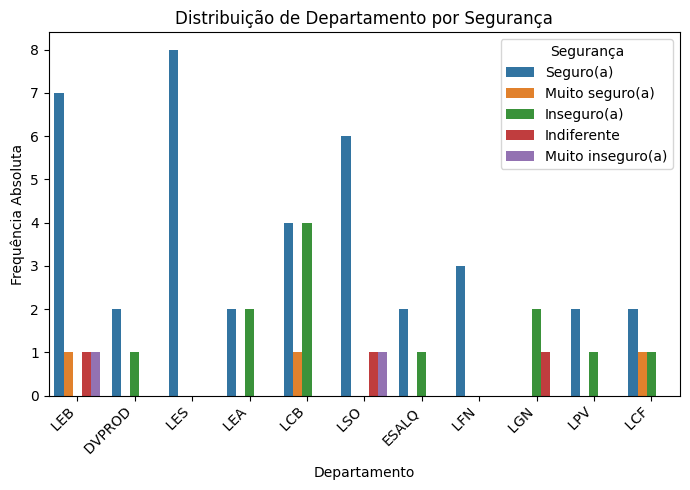

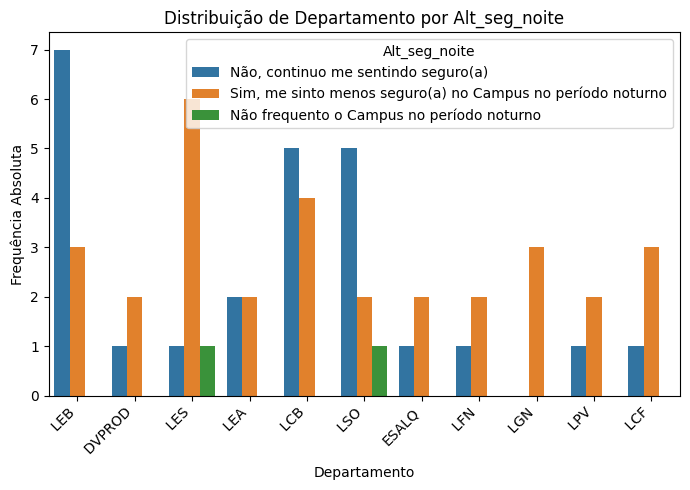

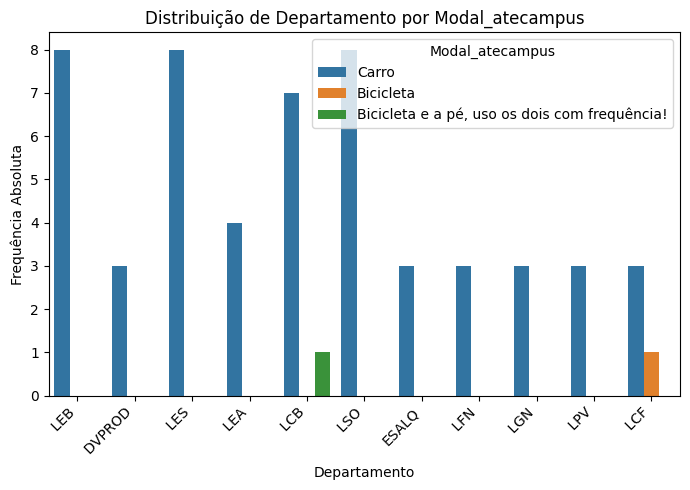

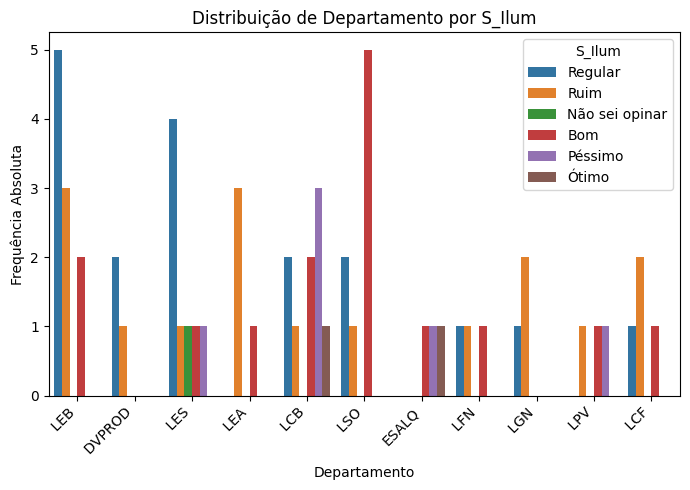

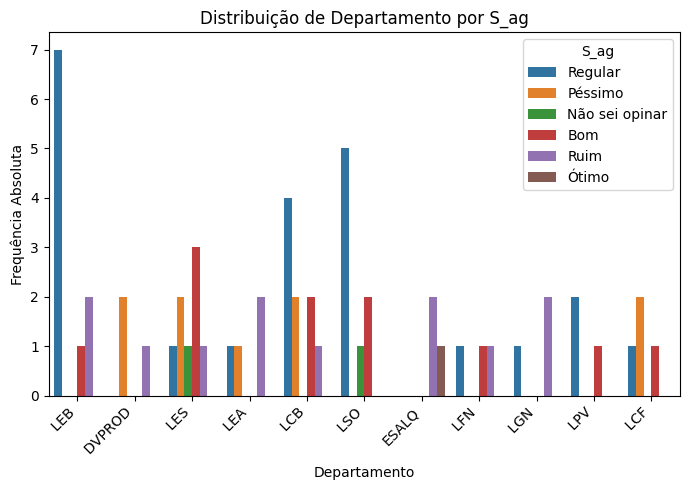

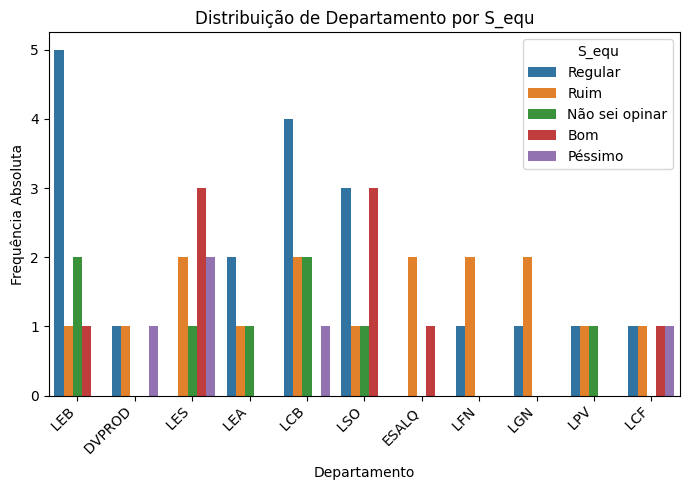

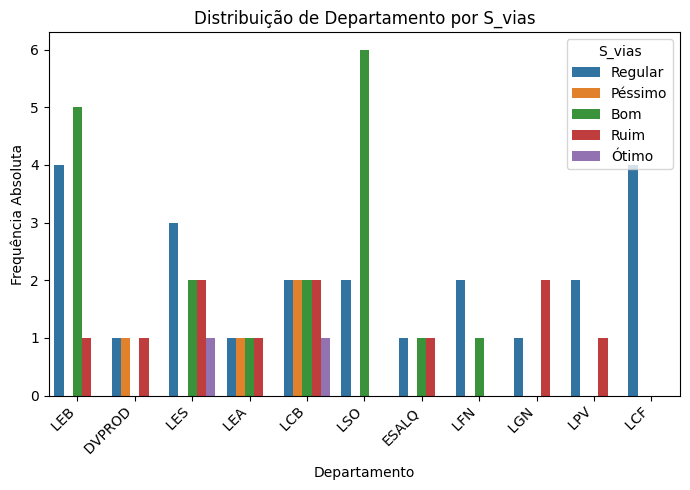

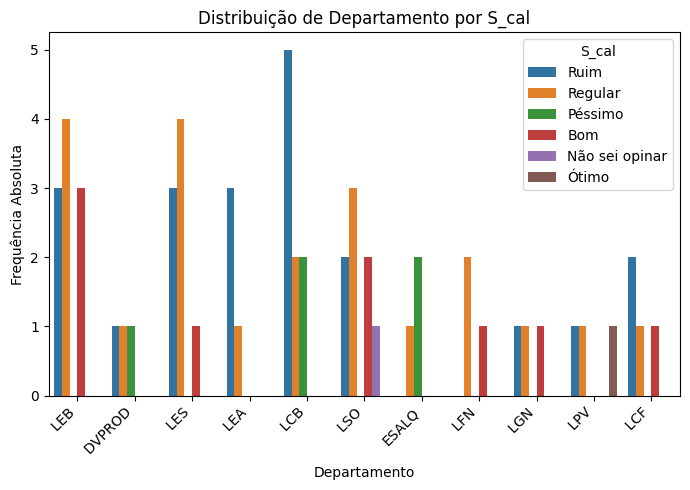

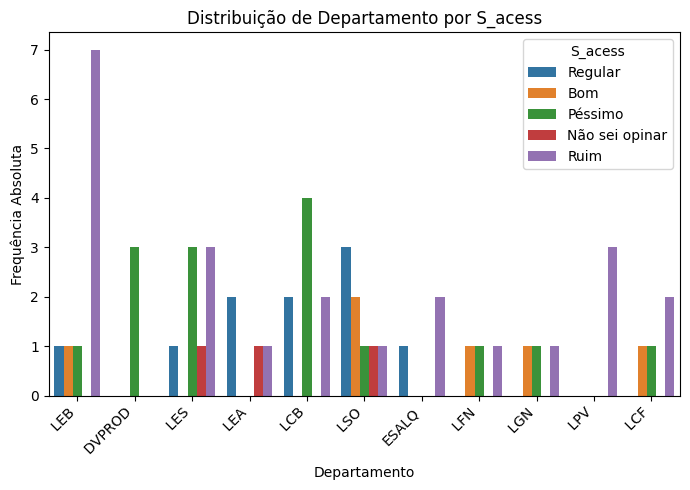

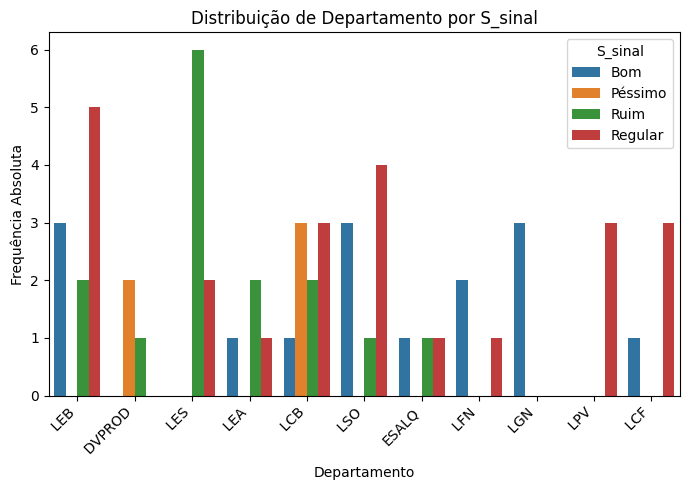

One or both columns ('Departamento', 'S_ciclovias') not found in the DataFrame.


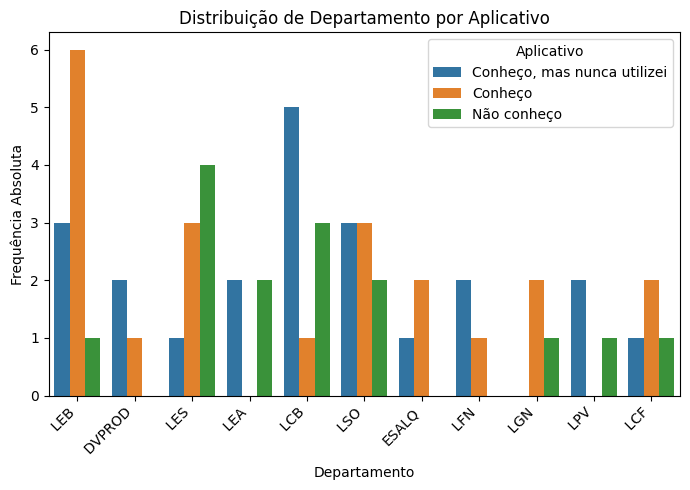

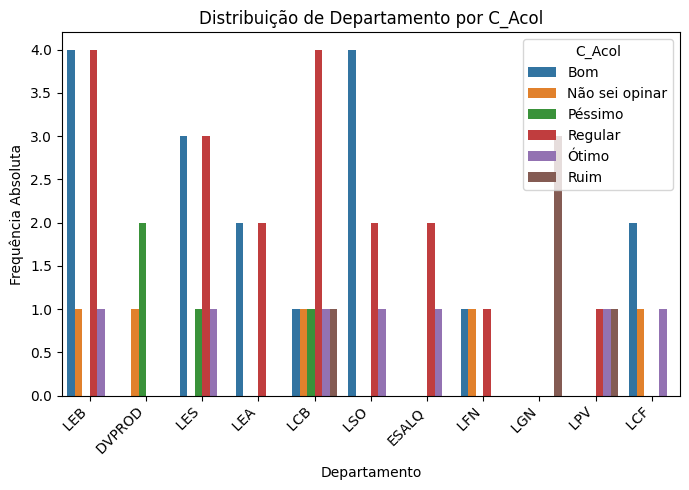

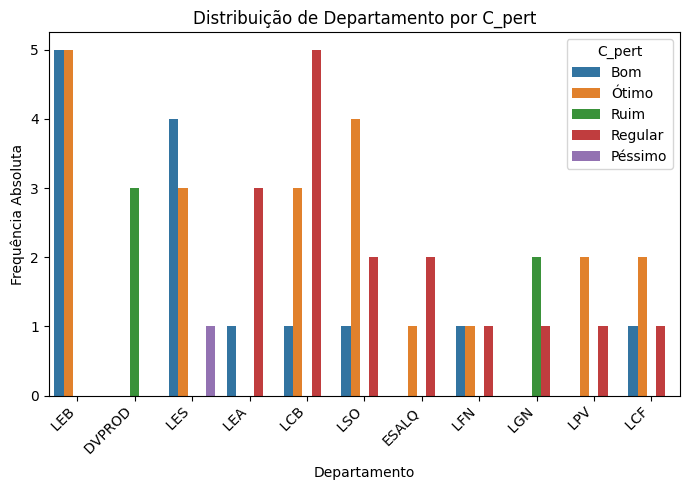

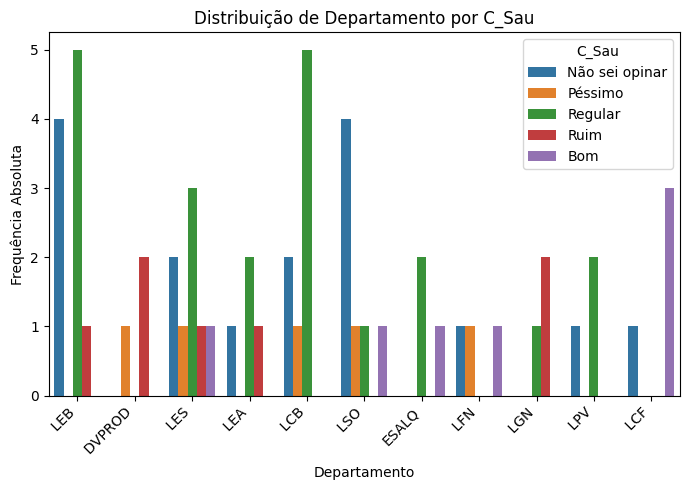

One or both columns ('Departamento', 'C_atendaluno') not found in the DataFrame.
One or both columns ('Departamento', 'C_PAPFE') not found in the DataFrame.
One or both columns ('Departamento', 'C_moradia') not found in the DataFrame.


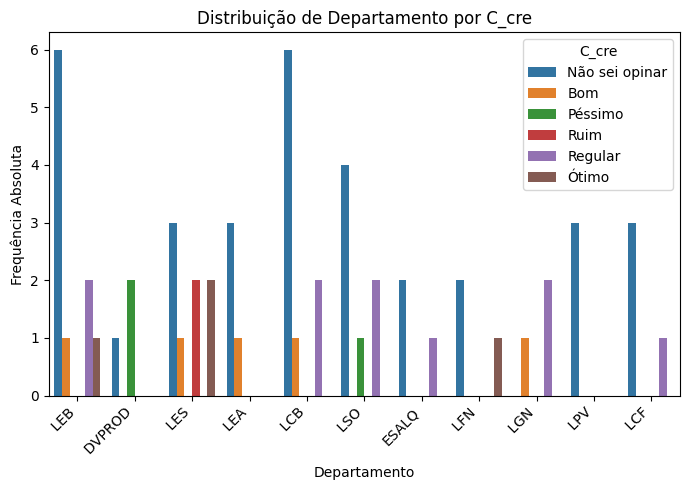

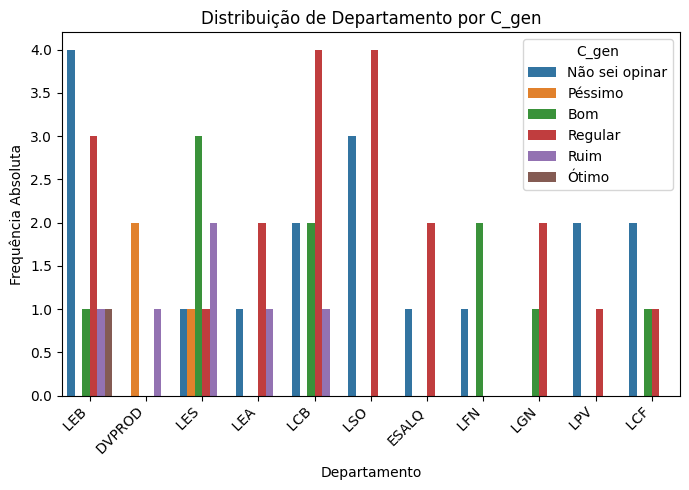

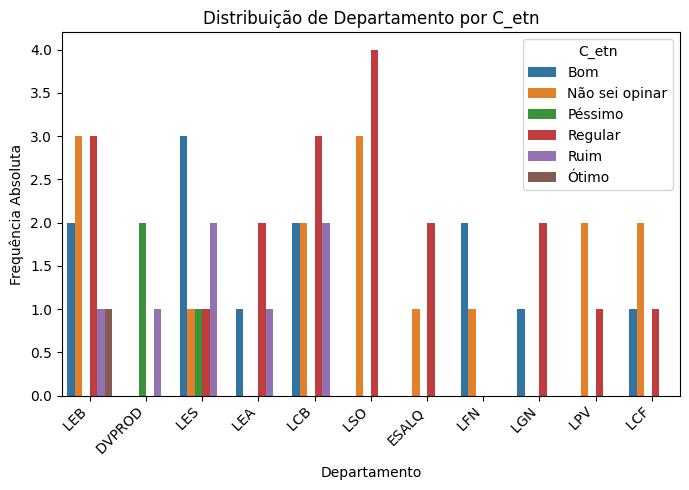

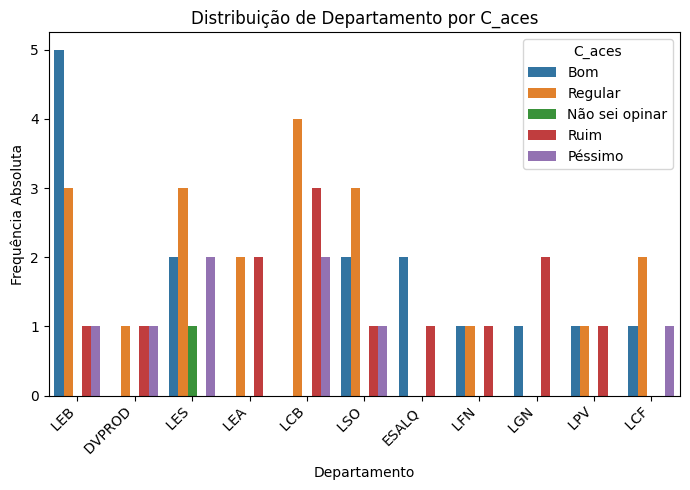

One or both columns ('Departamento', 'C_Rucas') not found in the DataFrame.


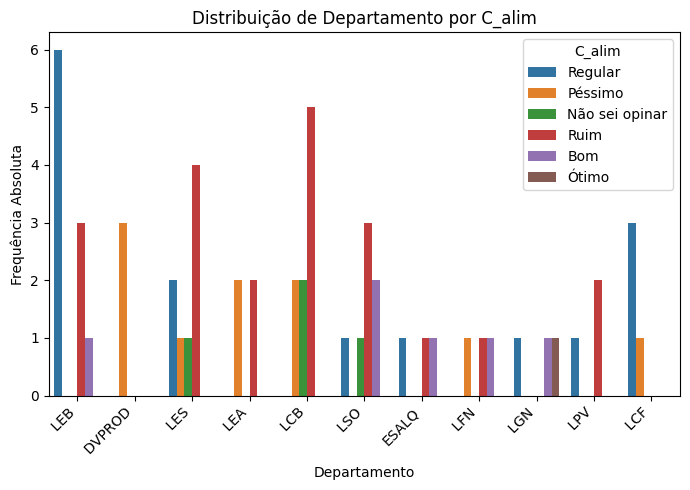

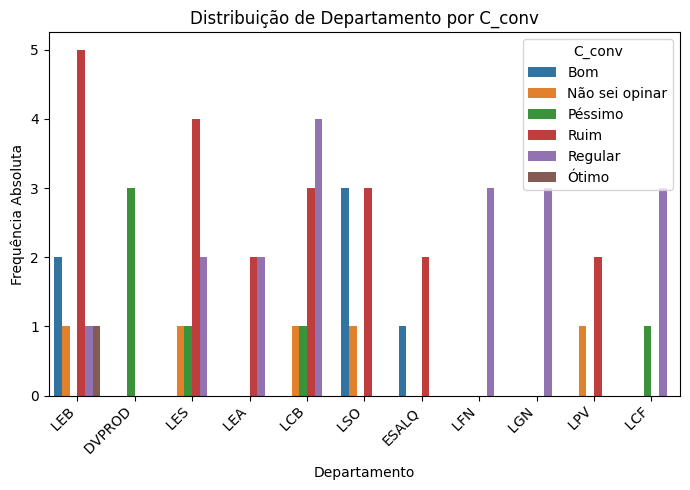

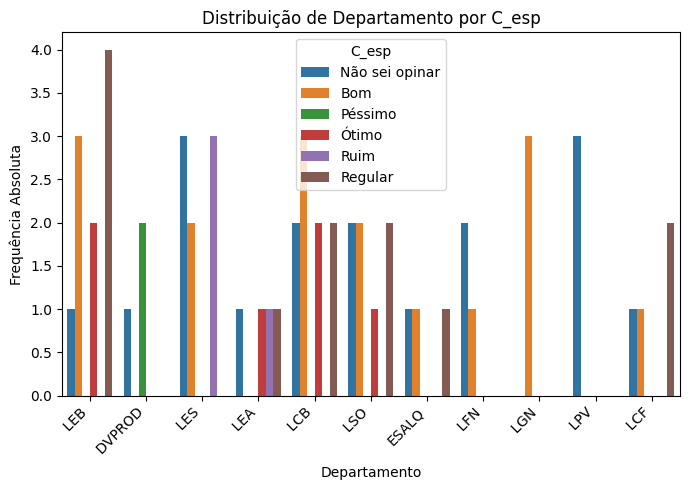

One or both columns ('Departamento', 'C_estudo') not found in the DataFrame.


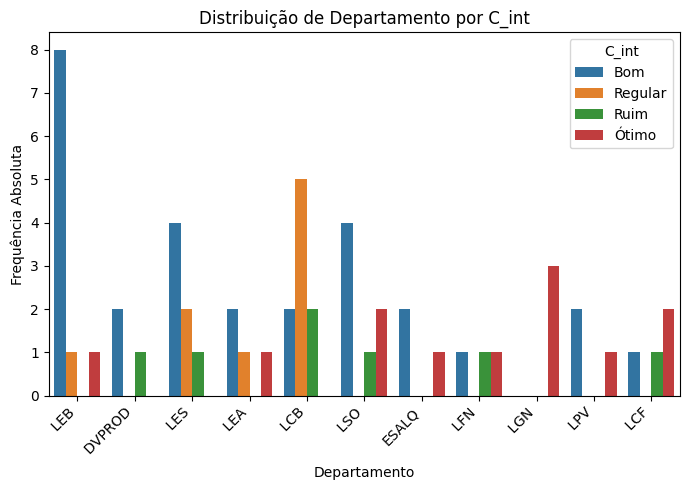

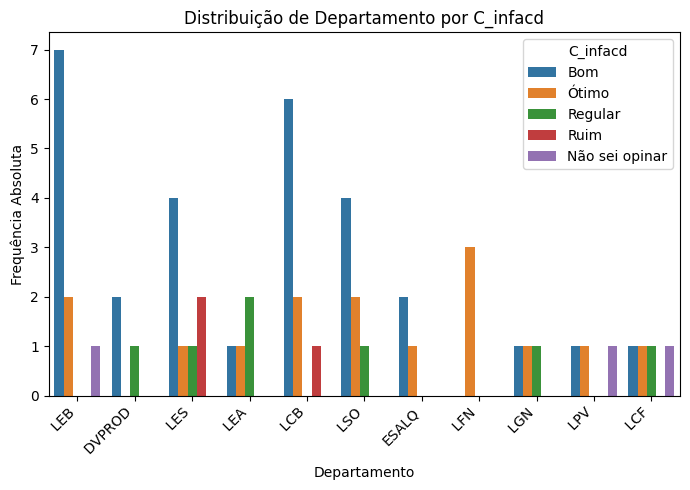

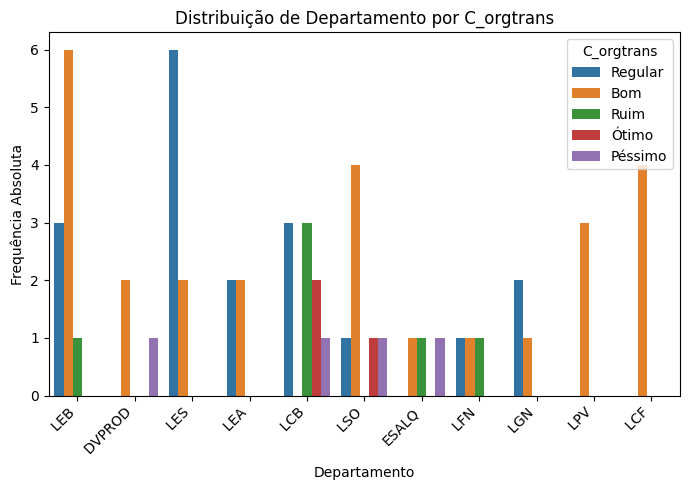

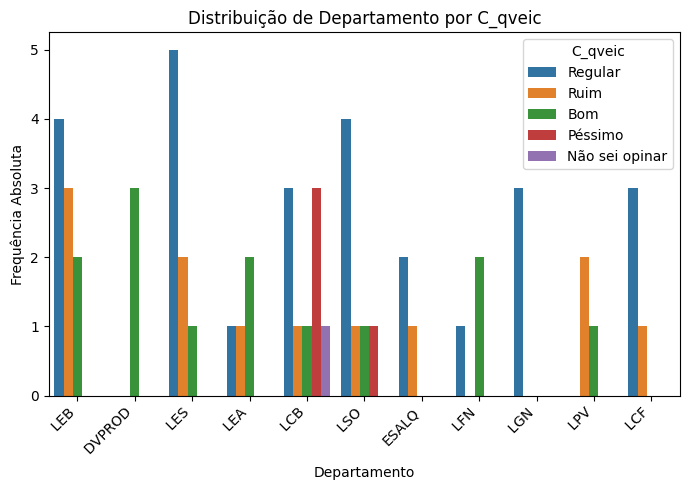

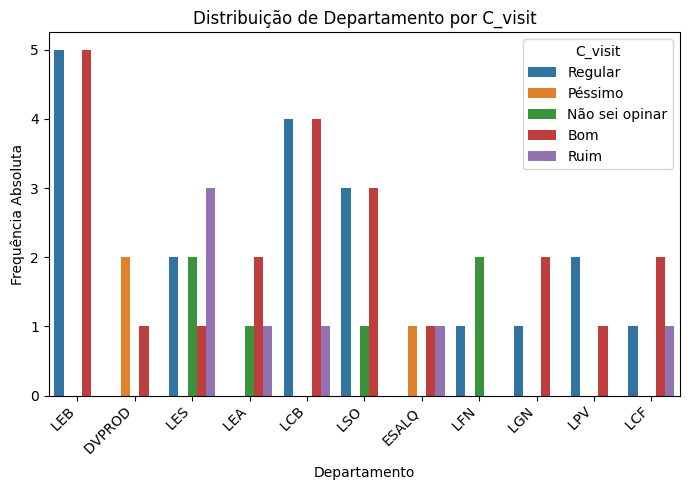

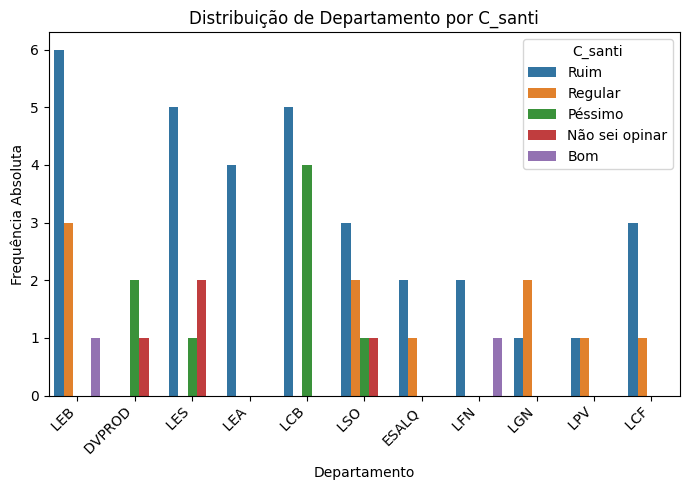

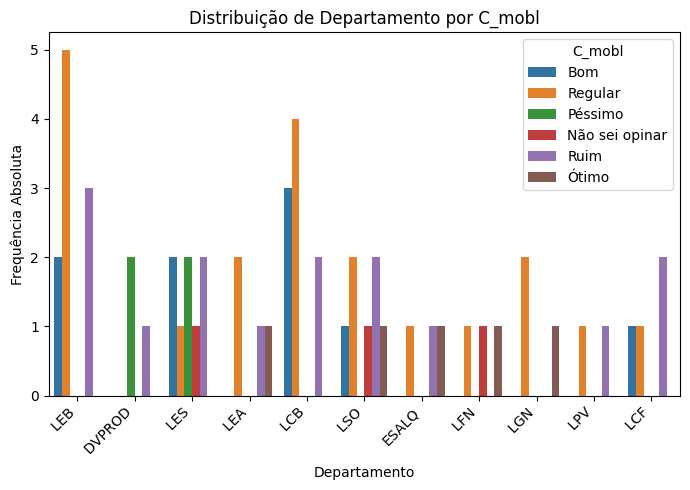

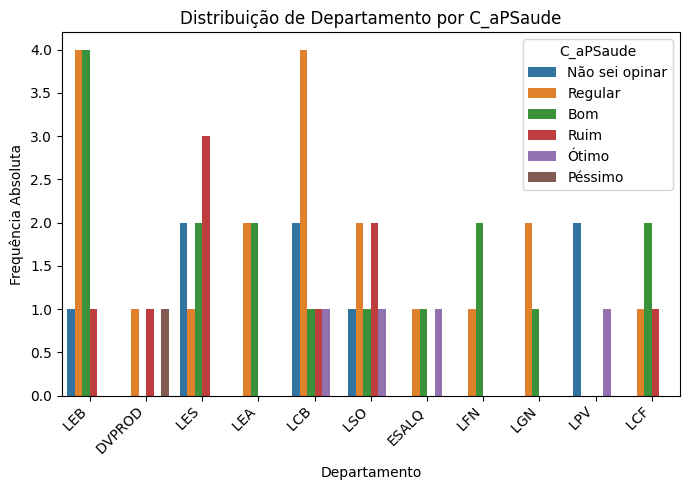

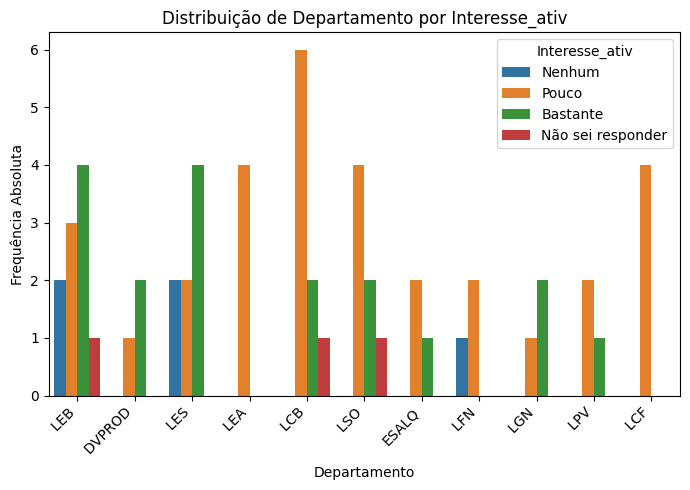

In [146]:
variables_to_plot = [
    'Frequencia', 'Impacto', 'Participação', 'Particip_fora',
    'Interesse', 'Conhecimento', 'Compromisso', 'Transformador', 'Segurança',
    'Alt_seg_noite', 'Modal_atecampus', 'S_Ilum', 'S_ag', 'S_equ', 'S_vias',
    'S_cal', 'S_acess', 'S_sinal', 'S_ciclovias', 'Aplicativo', 'C_Acol',
    'C_pert', 'C_Sau', 'C_atendaluno', 'C_PAPFE', 'C_moradia', 'C_cre', 'C_gen',
    'C_etn', 'C_aces', 'C_Rucas', 'C_alim', 'C_conv', 'C_esp', 'C_estudo',
    'C_int', 'C_infacd', 'C_orgtrans', 'C_qveic', 'C_visit', 'C_santi', 'C_mobl',
    'C_aPSaude', 'Interesse_ativ'
]

for col in variables_to_plot:
    if col in dados_docente_pesquisador.columns and 'Departamento' in dados_docente_pesquisador.columns:
        plt.figure(figsize=(7, 5))
        sns.countplot(data=dados_docente_pesquisador, x='Departamento', hue=col)
        plt.title(f'Distribuição de Departamento por {col}')
        plt.xlabel('Departamento')
        plt.ylabel('Frequência Absoluta')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title=col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"One or both columns ('Departamento', '{col}') not found in the DataFrame.")

In [147]:
dados_docente_pesquisador.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 2 to 74
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Vínculo           58 non-null     object  
 1   Sexo              58 non-null     object  
 2   Ano_ingresso      58 non-null     float64 
 3   Departamento      58 non-null     object  
 4   Frequencia        58 non-null     object  
 5   Campus_agradavel  58 non-null     object  
 6   Impacto           58 non-null     object  
 7   Participação      57 non-null     object  
 8   Particip_fora     57 non-null     object  
 9   Interesse         58 non-null     object  
 10  Conhecimento      58 non-null     object  
 11  Compromisso       58 non-null     object  
 12  Transformador     58 non-null     object  
 13  Segurança         58 non-null     object  
 14  Alt_seg_noite     58 non-null     object  
 15  Distância         58 non-null     float64 
 16  Modal_atecampus   55 non-null    